In [28]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer



In [29]:
BGL_for_OneClass= pd.read_csv("output/BGL_clusters2.csv")

In [30]:
BGL_for_OneClass.head()

,Unnamed: 0,timestamp,text,label,filename,clusters,tfidf_text,p-3-0,p-7-0,p-9-0,...,p-28-0,p-30-0,p-32-0,p-36-0,p-36-1,p-36-2,p-36-3,p-36-4,p-37-0,cluster2
0,0,1.117973e+12,RAS APP FATAL ciod: LOGIN chdir(/nfs/tmp1/ddcM...,False,R34-M0-NC-I:J18-U01,24,RAS APP FATAL ciod: LOGIN chdir(/nfs/tmp1/ddcM...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
1,1,1.117973e+12,RAS APP FATAL ciod: LOGIN chdir(/nfs/tmp1/ddcM...,False,R30-M1-N4-I:J18-U11,24,RAS APP FATAL ciod: LOGIN chdir(/nfs/tmp1/ddcM...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
2,2,1.117973e+12,RAS APP FATAL ciod: LOGIN chdir(/nfs/tmp1/ddcM...,False,R30-M1-N4-I:J18-U01,24,RAS APP FATAL ciod: LOGIN chdir(/nfs/tmp1/ddcM...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
3,3,1.117973e+12,RAS APP FATAL ciod: LOGIN chdir(/nfs/tmp1/ddcM...,False,R30-M0-N4-I:J18-U11,24,RAS APP FATAL ciod: LOGIN chdir(/nfs/tmp1/ddcM...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
4,4,1.117973e+12,RAS APP FATAL ciod: LOGIN chdir(/nfs/tmp1/ddcM...,False,R30-M0-N4-I:J18-U01,24,RAS APP FATAL ciod: LOGIN chdir(/nfs/tmp1/ddcM...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12


In [31]:
#one_hot_encoded_BGL = pd.get_dummies(BGL_for_OneClass['clusters'])
#one_hot_encoded_BGL.head()

#for col in one_hot_encoded_BGL.columns:
 #   col_name= "c"+str(col)
 #   BGL_for_OneClass[col_name]=one_hot_encoded_BGL[col]

#BGL_for_OneClass.head

In [32]:
BGL_for_OneClass.fillna(0,inplace=True)

#BGL_for_OneClass.drop(columns=['clusters','Unnamed: 0','timestamp','text','filename'], inplace=True)

#BGL_for_OneClass.columns

# One class SVM

In [33]:
from sklearn.svm import OneClassSVM
from numpy import quantile, where, random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDOneClassSVM

In [34]:
le = LabelEncoder()
X = BGL_for_OneClass.drop('label', axis =1)
#y = le.fit_transform(BGL_for_OneClass['label'])
y = le.fit_transform(BGL_for_OneClass['label'])

tfidf = TfidfVectorizer()
vectorized_text = tfidf.fit_transform(X['tfidf_text'])
print(type(vectorized_text))
X['vectorized_text'] = list(vectorized_text.toarray()) 
vectors_for_training = np.array(X['vectorized_text'].tolist())
#X_vectorized= X.drop('tfidf_text', axis =1)
#print(X_vectorized.columns)
print(vectors_for_training)


X_train, X_test, y_train, y_test = train_test_split(vectors_for_training, y, test_size=0.33, random_state=42)



<class 'scipy.sparse._csr.csr_matrix'>
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [35]:
# OCSVM hyperparameters
nu = 0.05
gamma = 2.0

oneclass = SGDOneClassSVM(
    nu=nu, shuffle=True, fit_intercept=True, random_state=42, tol=1e-4
).fit(X_train)
y_pred = oneclass.predict(X_test)
y_pred = [1 if i==-1 else 0 for i in y_pred]


Train Result:
Accuracy Score: 75.27%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.920945     0.063896   0.75274      0.492421      0.855741
recall         0.801151     0.164831   0.75274      0.482991      0.752740
f1-score       0.856882     0.092093   0.75274      0.474487      0.798697
support    28660.000000  2360.000000   0.75274  31020.000000  31020.000000
_______________________________________________
Confusion Matrix: 
 [[22961  5699]
 [ 1971   389]]

_______________________________________________
Recall Score: 
 0.16483050847457628
_______________________________________________
Roc AUC Score: 
 0.482990969519912


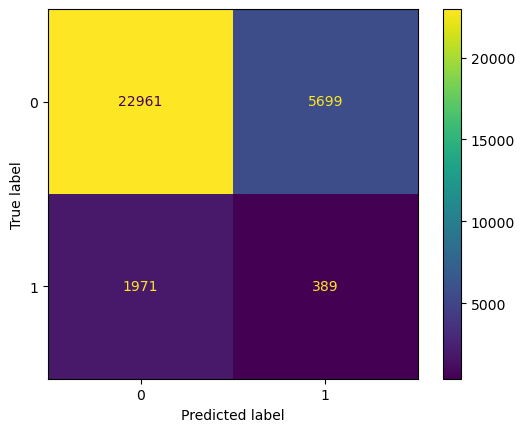

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, \
accuracy_score, confusion_matrix ,f1_score, precision_score, recall_score, auc
oneClass_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
print("Train Result:\n================================================")        
print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{oneClass_report}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}\n")
print("_______________________________________________")
print(f'Recall Score: \n {recall_score(y_test, y_pred)}')
print("_______________________________________________")
print(f'Roc AUC Score: \n {roc_auc_score(y_test, y_pred)}')

oneClass_report
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

